# Mathematik für Biologiestudierende

Wintersemester 2025/26

03.02.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen

* ANOVA als Lineares Modell
* Regression im exponentiellen Mpdell
* Logistische Regression

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf  #   <-----  neu

# ANOVA als Lineares Modell

In [2]:
zitronen = pd.read_csv("http://reh.math.uni-duesseldorf.de/~braun/bio2425/zitronen.csv")

In [3]:
zitronen.head()

,Vitamin_C_Gehalt,Land
0,494.5,Spanien
1,499.2,Spanien
2,494.3,Spanien
3,478.0,Spanien
4,500.1,Spanien


In [4]:
zitronen.Land.value_counts()

Land
Spanien         8
Italien         8
Griechenland    8
Marokko         8
Indien          8
Name: count, dtype: int64

In [5]:
import statsmodels.stats.anova as smf_anova

In [6]:
formel = "Vitamin_C_Gehalt ~ Land"
modell = smf.ols(formel, zitronen)
res = modell.fit()

In [7]:
tabelle = smf_anova.anova_lm(res)
tabelle

,df,sum_sq,mean_sq,F,PR(>F)
Land,4.0,4378.44650,1094.611625,11.873758,0.000003
Residual,35.0,3226.56125,92.187464,NaN,NaN


* Der *p*-Wert ist derselbe wie in Lektion 17
* `tabelle` ist ein `DataFrame`
* Die Einträge unter `Residual` sind die Ergebnisse von Zwischenrechnungen
* Sie werden bsp. bei der Bestimmung der Effektstärke benötigt

* Die Nachkommastellen des *p*-Werts erhalten wir wie folgt

In [8]:
tabelle['PR(>F)'].Land

3.3733416696759452e-06

Die gemäß Bonferroni-Holm korrigierten *p*-Werte für die Paarvergleiche erhalten wir wie in Lektion 17

In [9]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [10]:
muc = MultiComparison(zitronen.Vitamin_C_Gehalt, zitronen.Land)

In [11]:
multitest = muc.allpairtest(stats.ttest_ind, method='holm')
multitest[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,True
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,True
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,True
Italien,Marokko,-4.3312,0.0007,0.0055,True
Italien,Spanien,-3.3042,0.0052,0.0302,True
Marokko,Spanien,2.2786,0.0389,0.1556,False


Das sind andere Zahlen als bei `res.summary`, weil `res.summary` die Treatments nur mit dem Default vergleicht und nicht untereinander

# Regression im exponentiellen Modell

#### Beispiel Covid-Erkrankungen

In [12]:
corona = pd.read_csv('corona.csv')
corona.head()

,Tag (im März),Anzahl
0,3,38
1,4,52
2,5,109
3,6,185
4,7,150


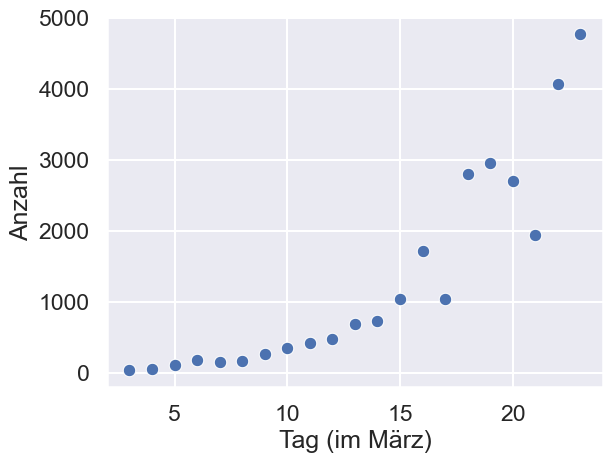

In [13]:
ax = sns.scatterplot(data=corona, x="Tag (im März)", y="Anzahl");

* Das Wachstum war exponentiell
* Es gab aber Schwankungen durch unterschiedliche Verzögerungen der Berichte der Gesundheitsämter

# Halblogarithmische Darstellung

Bei halblogarithmischer Darstellung

* ist die $x$-Achse linear skaliert: Gleiche absolute Zuwächse pro Längeneinheit
* ist die $y$-Achse logarithmisch skaliert: Gleiche relative Zuwächse pro Längeneinheit
* Das bedeutet:  Der Logarithmus der Daten wird angezeigt, und die $y$-Achse wird entsprechend unterteilt
* Exponentiell wachsende Daten liegen bei halblogarithmischer Darstellung annäherend auf einer wachsenden Geraden, exponentiell fallende auf einer fallenden Geraden

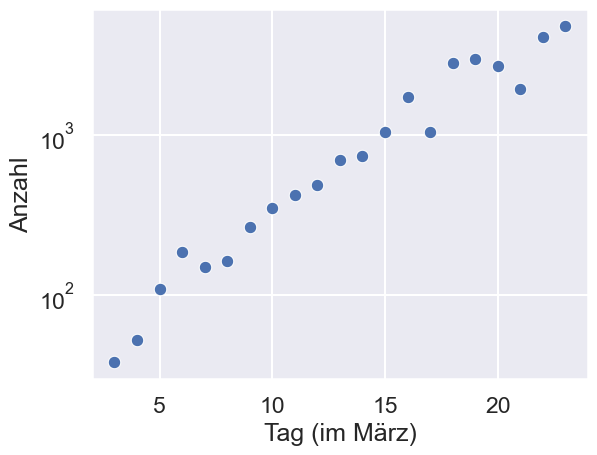

In [14]:
ax.set_yscale('log')
ax.figure

## Exponentielles Modell vs. Lineare Regression

* Lineares Modell: in gleichen Zeitabständen gleiche absolute Zuwächse
* Exponentielles Modell: in gleichen Zeitabständen gleiche relative Zuwächse
* Biologische Wachstums- oder Abklingprozesse verlaufen meistens exponentiell
* Aufgabe der Regression im exponentiellen Modell ist es, bei Wachstumsprozessen die Verdoppelungszeit und bei    Abklingprozessen die Halbwertszeit zu bestimmen

* Dies geschieht, indem man die Werte logarithmiert und dann deren lineare Regression berechnet

## Regression im exponentiellen Modell

* $x$ die Zeit, $z$ Daten, die exponentiell wachsen (bzw. abklingen)
* Modellgleichung für Wachstumsprozess: 
$$      z = c \cdot e^{m\cdot x}  $$
* logarithmierte Modellgleichung
$$      y = \ln(z) = \ln(c) + m \cdot x  $$

* bestimme diese Gerade durch lineare Regression
* wenn $m < 0$, dann Abklingprozess

In [15]:
corona['logAnzahl'] = np.log(corona.Anzahl)
corona['Tag'] = corona['Tag (im März)']

In [16]:
formel = 'logAnzahl ~ Tag'
modell = smf.ols(formel, corona)
res = modell.fit()

In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logAnzahl   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     458.1
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           9.25e-15
Time:                        09:20:35   Log-Likelihood:                -2.9636
No. Observations:                  21   AIC:                             9.927
Df Residuals:                      19   BIC:                             12.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4410      0.151     22.728      0.000       3.124       3.758
Tag            0.2260      0.011     21.403      0.000       0.204       0.248
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.816
Skew:                          -0.438   Prob(JB):                        0.665
Kurtosis:                       2.594   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* m = 0.226
* b = 3.441

Die Regressionsgerade für die logarithmierten Daten ist
$$  y = 0.226 \cdot x + 3.441
$$

In [18]:
tage = np.arange(3, 24)
gerade = 0.226*tage + 3.441

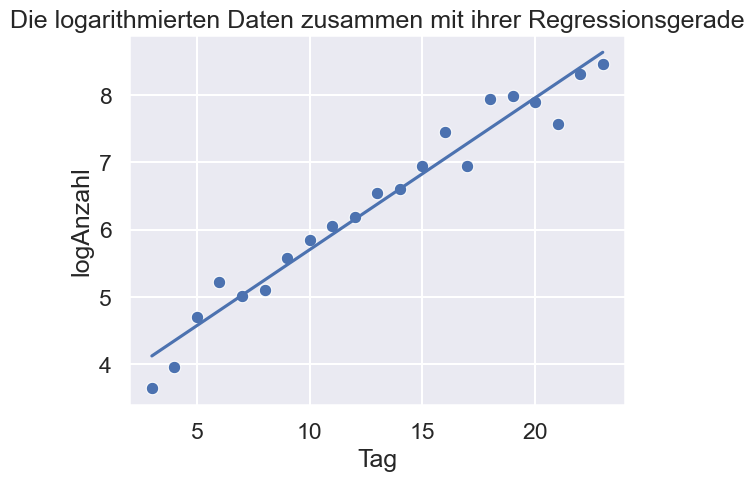

In [19]:
titel = "Die logarithmierten Daten zusammen mit ihrer Regressionsgerade"
ax2 = sns.scatterplot(x=corona.Tag, y=corona.logAnzahl)
sns.lineplot(x=tage, y=gerade)
ax2.set_title(titel);

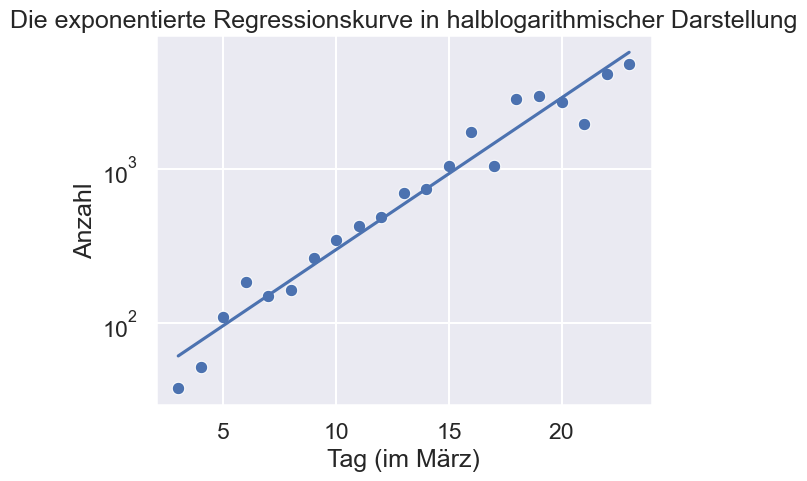

In [20]:
titel = "Die exponentierte Regressionskurve in halblogarithmischer Darstellung"
sns.lineplot(x=tage, y=np.exp(gerade), ax=ax)
ax.set_title(titel)
ax.figure

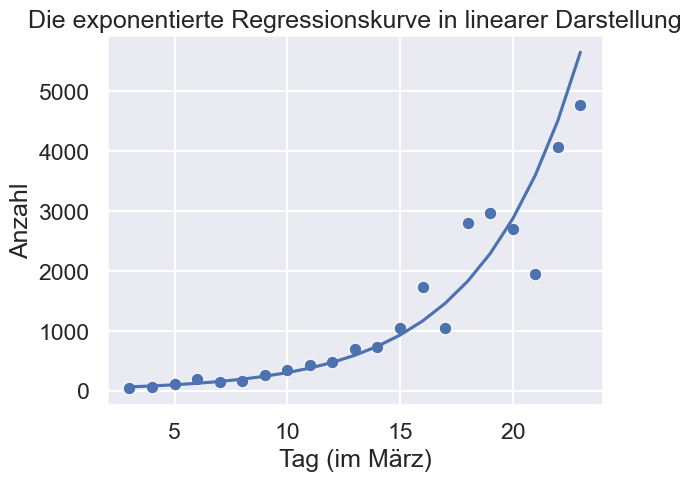

In [21]:
titel = "Die exponentierte Regressionskurve in linearer Darstellung"
ax.set_title(titel)
ax.set_yscale('linear')
ax.figure

# Halbwerts- bzw. Verdoppelungszeit

(aus Lektion 2)

* Modell eines Wachstumsprozesses
$$      z = c \cdot e^{m\cdot x}  $$
* Verdoppelungszeit $t$ bestimmt durch
$$      e^{m\cdot t} = 2   $$
* Also
$$      t = \frac{\ln 2}m  $$
* Bei Abklingprozessen ist $m < 0$, dann ist
$$     t = -\frac{\ln 2}m  $$
    die Halbwertszeit

#### Im Beispiel Covid

In [22]:
m = 0.226

In [23]:
t = np.log(2) / m
t

3.067022922831616

Die Verdoppelungszeit betrug 3.07 Tage

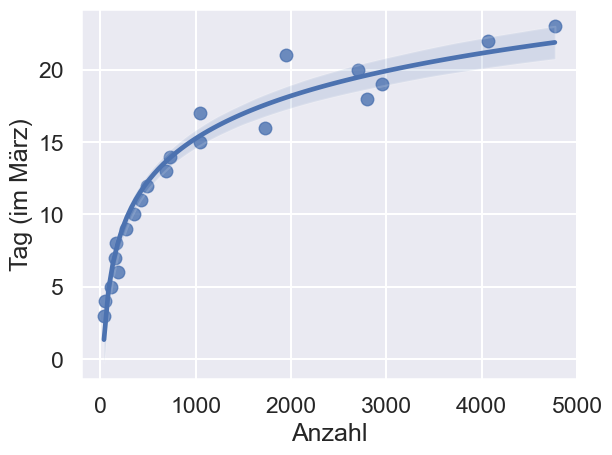

In [24]:
sns.regplot(corona, x="Anzahl", y="Tag (im März)", logx=True);

# Logistische Regression

* Wenn die abhängige Variable nur die Werte 0 und 1 annehmen kann, kann eine logistische Regression durchgeführt werden
* Meistens steht dann 0 für "Nein" und 1 für "Ja"

In [25]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
formel = "survived ~ sex + age + embark_town + C(pclass)"

* `pclass` wird durch eine Zahl angegeben
* `C(pclass)` bedeutet, dass diese Variable trotzdem kategoriell verstanden werden soll

In [27]:
modell = smf.logit(formel, titanic)
res = modell.fit()

Optimization terminated successfully.
         Current function value: 0.451318
         Iterations 6


* Im Gegensatz zu `smf.ols` ist `smf.logit` nichtlinear
* Im Hintergrung läuft ein nichtlineares Optimierungsprogramm ab
* Wir sehen die Statusmeldung des Optimierungsprogramms

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:                  0.3312
Time:                        09:20:36   Log-Likelihood:                -321.34
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.013e-65
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.0368      0.431      9.371      0.000       3.193       4.881
sex[T.male]                   -2.5158      0.209    -12.020      0.000      -2.926      -2.106
embark_town[T.Queenstown]     -0.8142      0.568     -1.434      0.152      -1.927       0.299
embark_town[T.Southampton]    -0.4937      0.267     -1.850      0.064      -1.017       0.029
C(pclass)[T.2]                -1.1446      0.291     -3.938      0.000      -1.714      -0.575
C(pclass)[T.3]                -2.4096      0.291     -8.275      0.000      -2.980      -1.839
age                           -0.0361      0.008     -4.677      0.000      -0.051      -0.021
==============================================================================================
"""

In [29]:
anfrage = pd.DataFrame()
anfrage['sex'] = ['male', 'male', 'female']
anfrage['embark_town'] = ['Southampton', 'Southampton', 'Southampton']
anfrage['age'] = [35, 45, 45]
anfrage['pclass'] = [1,2,3]
anfrage

,sex,embark_town,age,pclass
0,male,Southampton,35,1
1,male,Southampton,45,2
2,female,Southampton,45,3


In [30]:
res.get_prediction(anfrage).summary_frame()

,predicted,se,ci_lower,ci_upper
0,0.441399,0.054207,0.339307,0.548697
1,0.149196,0.030443,0.098769,0.219110
2,0.379875,0.059188,0.272391,0.500592


#### Beispiel Klausurergebnis und Übungspunkte

* Die abhängige Variable ist ein Klausurergebnis: bestanden ja (=1) und nein (=0)
* Die abhängige Variable ist kategoriell
* muss aber als 0 und 1 kodiert sein
* Erklärende Variablen können quantitativ oder kategoriell sein

* im Beispiel:  In die Klausur eingebrachte Übungspunkte `ksp`
* quantitativ von 0 bis 6

In [31]:
kl = pd.read_csv('bsp_logit.csv')
kl.head()

,bestanden,ksp
0,0,6.0
1,1,6.0
2,0,3.0
3,1,6.0
4,0,6.0


In [32]:
formel = "bestanden ~ ksp"
modell = smf.logit(formel, kl)
res = modell.fit()

Optimization terminated successfully.
         Current function value: 0.480427
         Iterations 6


In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              bestanden   No. Observations:                  184
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                            1
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:                  0.1364
Time:                        09:20:36   Log-Likelihood:                -88.399
converged:                       True   LL-Null:                       -102.36
Covariance Type:            nonrobust   LLR p-value:                 1.267e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1447      0.470     -2.434      0.015      -2.066      -0.223
ksp            0.5044      0.100      5.024      0.000       0.308       0.701
==============================================================================
"""

* Der Einfluss der Übungspunkte auf das Klausurergebnis ist hochsignifikant

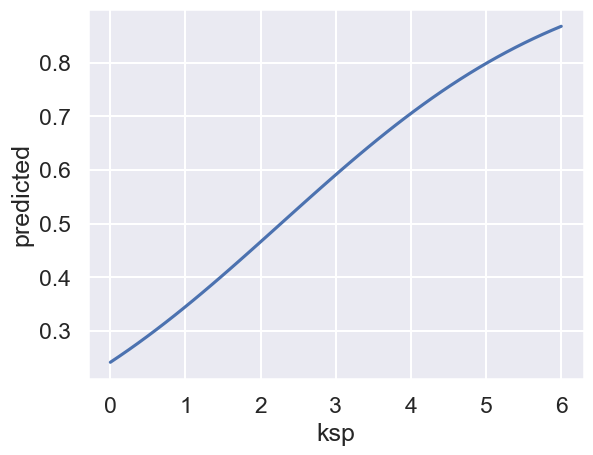

In [34]:
anfrage = pd.DataFrame()
anfrage['ksp'] = np.linspace(0, 6, 50)
sns.lineplot(x=anfrage.ksp, y=res.get_prediction(anfrage).summary_frame()['predicted']);

Wir sehen nur einen kleinen Ausschnitt aus der logistischen Kurve. Wir ergänzen den Datenbereich der erklärenden Daten um unsinnige Werte, um die Gestalt der logistische Kurve zu zeigen

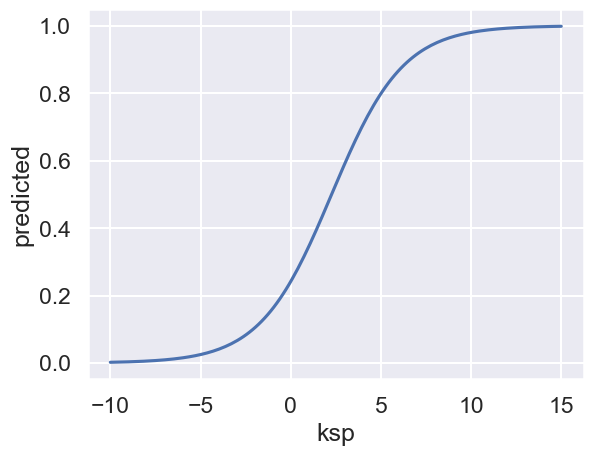

In [35]:
anfrage = pd.DataFrame()
anfrage['ksp'] = np.linspace(-10, 15, 150)
sns.lineplot(x=anfrage.ksp, y=res.get_prediction(anfrage).summary_frame()['predicted']);

* Die logistische Kurve ist 
$$
    y = \frac1{1+e^{-b - m \cdot x}}
$$
* Logistische Regression findet die optimale Annäherung an die Datenpunkte durch eine logistische Kurve

jitter: Verwackeln der Datenpunkte, damit sich mehrere Punkte beim scatterplot nicht gegenseitig verdecken

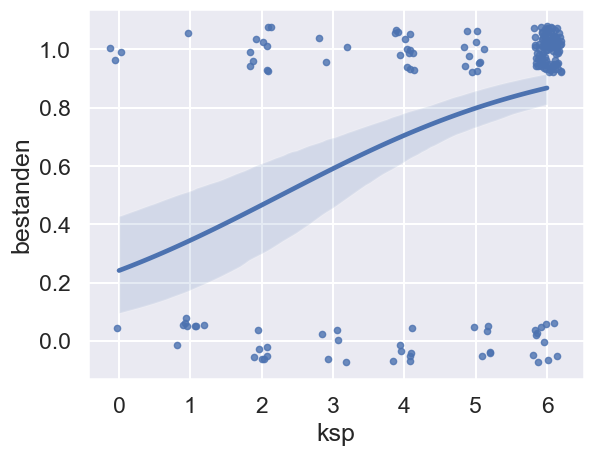

In [38]:
sns.regplot(kl, x='ksp', y='bestanden', logistic=True, y_jitter=0.08, x_jitter=0.2, marker='.');

# Morgen Probeklausur